In [ ]:
import numpy as np
import magpylib as magpy

from currio.utils import get_multipole_expansion_from_line_currents
from currio.utils import get_multipole_expansion_from_current_density
from currio.tests.test_multipole import create_loop

import magrec
from magrec.misc.sampler import GridSampler
from magrec.misc.plot import plot_vector_field_2d

In [2]:
pts, crs = create_loop(1, 1, n=300)

# get_multipole_expansion(crs, pts, order=0)
get_multipole_expansion_from_line_currents(crs, pts, order=1)

array([0.        , 0.        , 3.14136298])

In [3]:
J = np.random.normal(0, 1, (16, 3))
pts = np.random.normal(0, 1, (16, 3))

get_multipole_expansion_from_current_density(J, pts, volume_element=1, order=1)

array([ 0.63790382,  2.00328143, -0.01352075])

In [7]:
loop = magpy.current.Polyline(vertices=pts, current=1)
loop.show()

In [7]:
Jxy = np.loadtxt('/Users/mf/Documents/HIM/Equivalent Current Dipole/Jxy.csv', float, delimiter=',')

In [ ]:
Js = Jxy[:, 0]
current_density = np.zeros((len(Js), 3))
current_density[:, 0] = Js
xs = Jxy[:, 1]
ys = Jxy[:, 2]
pts = np.stack([xs, ys, np.zeros_like(xs)], axis=1)



# TODO:

For Aug 7, 2025:

1. Implement iterating through a custom grid spec over a current density and compute `get_multipole_expansion_from_current_density` on it. Return as a vector of size (`n_columns`, `n_rows`, `monopole_compoents` = 3)

Only monopole will have 3 components (_z is 0)

Function signature:

```python
def get_grid_monopole_expansion(current_density, grid_spec):
    ```
    grid_spec: a tuple with (n_columns, n_rows)
    ```
    pass
```

2. Add monopole expansion terms to the `plot_vector_field_2d` function: monopole vectors should be placed at the grid element centers and plotted with a different color and the scale bar for size (or something like this).

3. Think how time comes into play: it will be additional dimension in the input. Your J density is `(2, 3, n_time_steps)`. Return as `(2, 3, n_time_steps, monopole_components)`. 

---

4. Ask Alessandro for spiral current density.
5. Compute the monopole expansion of the spiral current density.

---

For later

MATH:

6. Read about dipole moments. 
7. Implement dipole moment calculation from current density. Use the same grid spec. 


Send Valerio:
phone number to contact me in WhatsApp
paper about multipole expansion
link to magrec and currio github repos

In [50]:
get_multipole_expansion_from_current_density(current_density, pts, volume_element=1, order=0)

array([42642.41480104,     0.        ,     0.        ])

In [51]:
get_multipole_expansion_from_current_density(current_density, pts, volume_element=1, order=1)

array([       0.        ,        0.        , -2675811.52876557])

In [4]:
# Get dipole moment of a current wire
N = 100
currents = np.stack([np.ones(N), np.zeros(N), np.zeros(N)], axis=1)
xs, ys = np.meshgrid(np.linspace(0, 1, N), np.linspace(0, 1, N))
pts = np.stack([xs, ys, np.zeros_like(xs)], axis=2)
pts = pts.reshape(-1, 3)
r0 = np.array([0, 0, 0])

order = 1
result = get_multipole_expansion_from_line_currents(currents, pts, order, r0=np.array([0, 0, 0]))
print(result)

ValueError: Number of points must be one more than number of segments, got `pts` with length 10000 and `currents` with length 100

In [29]:
currents.shape

(100, 3)

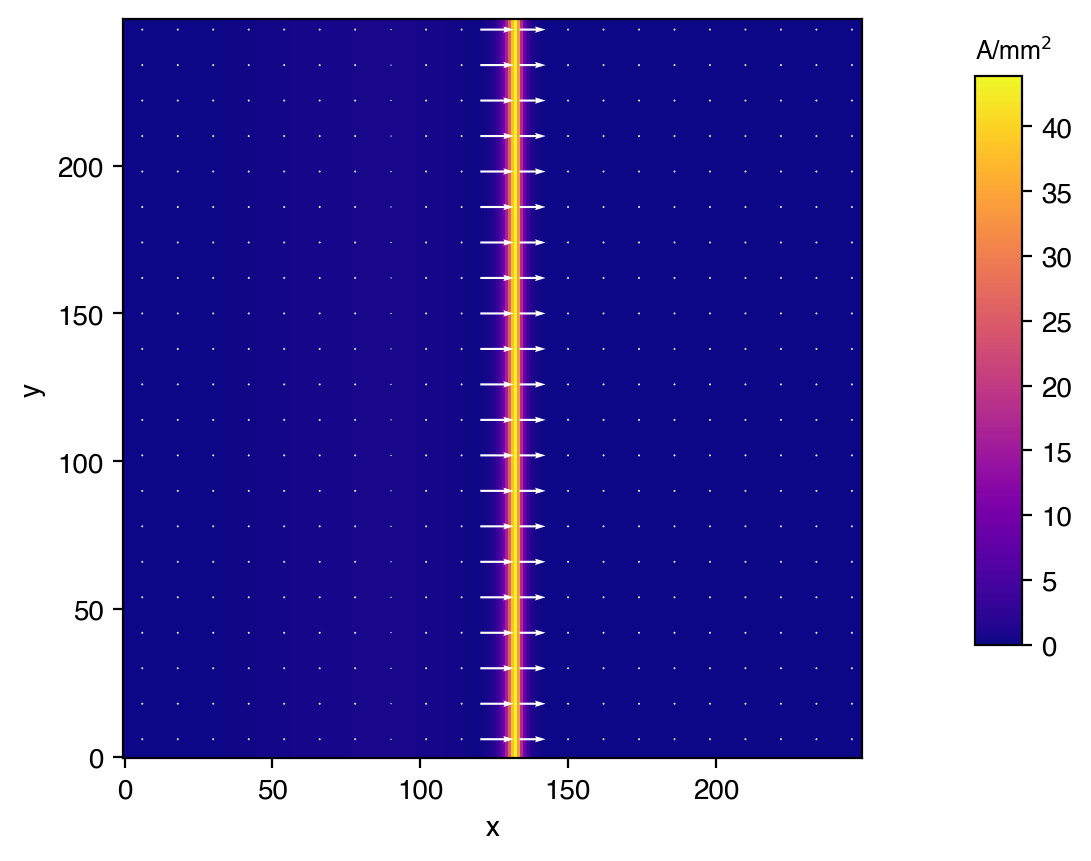

In [49]:
plot_vector_field_2d(GridSampler.pts_to_grid(current_density, 250, 250)[0:2, :, :].permute(0, 2, 1), color='white', units=r'A/mm$^2$')

In [ ]:
loop = magpy.current.Circle(current=1, diameter=1)

loop.show()

In [ ]:
loop = magpy.current.Circle(current=1, diameter=1)

loop.show()